In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

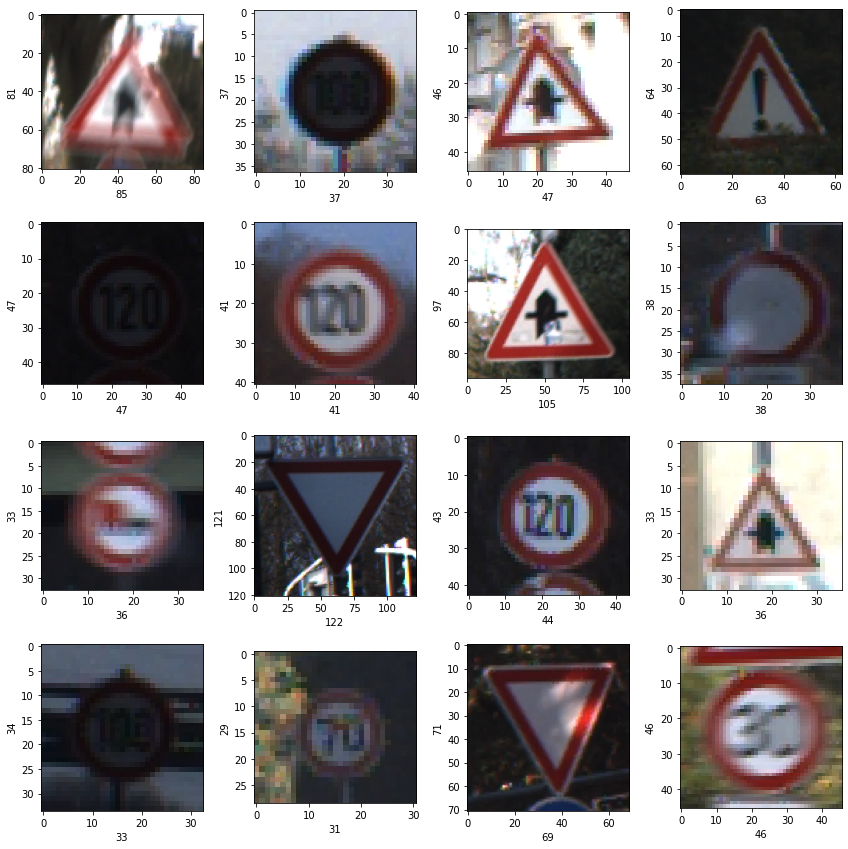

In [2]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "../data/test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.

In [3]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = '../data/train' + '/{:05d}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.  

In [4]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


Now we will find out the mean value of both the dimensions and analyse them. Here, we can see that (50,50) is the average shape for all the images.

In [5]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = '../data/train' + '/{:05d}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Now we will reshape the images into (50,50) and also store their label ids.

In [6]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

Now we will convert all the images into numpy array and normalize them.

In [7]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [8]:
images.shape

(39209, 50, 50, 3)

Checking the shape of the images. Here we can see that their are 39209 images with a shape of (50,50,3.)

In [9]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced.

In [10]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.5, random_state = 123)

The next step would be to split the data into training and validation with 50% of training data and 50% of validation data.

In [11]:
y_train


array([ 9, 25,  3, ..., 11, 23, 10])

In [12]:
x_train.shape

(19604, 50, 50, 3)

In [13]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [14]:
y_train_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Converting the classes column into categorical using to_categorical() function.

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43, activation = 'softmax'))

Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2560128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                5

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [17]:
model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/20
154/154 - 15s - loss: 2.3738 - accuracy: 0.3847 - val_loss: 1.1855 - val_accuracy: 0.7228
Epoch 2/20
154/154 - 15s - loss: 0.9719 - accuracy: 0.7256 - val_loss: 0.5571 - val_accuracy: 0.8849
Epoch 3/20
154/154 - 15s - loss: 0.5604 - accuracy: 0.8408 - val_loss: 0.3383 - val_accuracy: 0.9170
Epoch 4/20
154/154 - 15s - loss: 0.4051 - accuracy: 0.8836 - val_loss: 0.2422 - val_accuracy: 0.9493
Epoch 5/20
154/154 - 15s - loss: 0.3071 - accuracy: 0.9114 - val_loss: 0.2037 - val_accuracy: 0.9509
Epoch 6/20
154/154 - 15s - loss: 0.2517 - accuracy: 0.9262 - val_loss: 0.1742 - val_accuracy: 0.9559
Epoch 7/20
154/154 - 15s - loss: 0.2139 - accuracy: 0.9362 - val_loss: 0.1502 - val_accuracy: 0.9621
Epoch 8/20
154/154 - 15s - loss: 0.1902 - accuracy: 0.9445 - val_loss: 0.1362 - val_accuracy: 0.9657
Epoch 9/20
154/154 - 15s - loss: 0.1658 - accuracy: 0.9492 - val_loss: 0.1282 - val_accuracy: 0.9691
Epoch 10/20
154/154 - 15s - loss: 0.1445 - accuracy: 0.9567 - val_loss: 0.1173 - val_accura

Now we will fit the model and observe how our is getting trained on each epoch.

<AxesSubplot:>

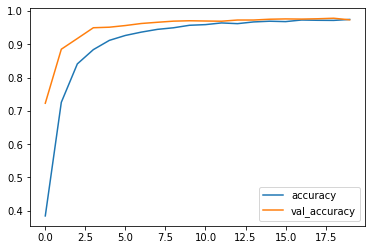

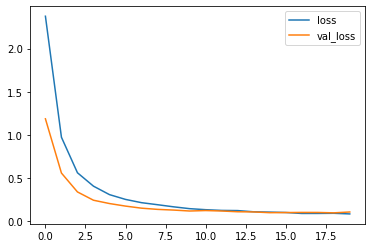

In [18]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.